In [ ]:
# import tensorflow as tf
import numpy as np
import glob
import keras as k
from keras.preprocessing.image import ImageDataGenerator
import PIL
import glob
from keras import Input
from keras.layers import Lambda,LeakyReLU,Conv2D,Dense,Dropout,Conv2DTranspose,MaxPooling2D,concatenate,UpSampling2D
from keras.models import Model
import cv2
import PIL
import matplotlib.pyplot as plt
import skimage.io as io


In [ ]:
height=256
width=256
channle=1

inputs=Input((height,width,channle))

c1=Conv2D(64,3,padding="same",activation="relu",kernel_initializer="he_normal")(inputs)
c1=Conv2D(64,3,padding="same",activation="relu",kernel_initializer="he_normal")(c1)
p1=MaxPooling2D()(c1)

c2=Conv2D(128,3,padding="same",activation="relu",kernel_initializer="he_normal")(p1)
c2=Conv2D(128,3,padding="same",activation="relu",kernel_initializer="he_normal")(c2)
p2=MaxPooling2D()(c2)

c3=Conv2D(256,3,padding="same",activation="relu",kernel_initializer="he_normal")(p2)
c3=Conv2D(256,3,padding="same",activation="relu",kernel_initializer="he_normal")(c3)
p3=MaxPooling2D()(c3)

c4=Conv2D(512,3,padding="same",activation="relu",kernel_initializer="he_normal")(p3)
c4=Conv2D(512,3,padding="same",activation="relu",kernel_initializer="he_normal")(c4)
drop4=Dropout(.5)(c4)
p4=MaxPooling2D()(drop4)

c5=Conv2D(1024,3,padding="same",activation="relu",kernel_initializer="he_normal")(p4)
c5=Conv2D(1024,3,padding="same",activation="relu",kernel_initializer="he_normal")(c5)
drop5=Dropout(.5)(c5)

u6=Conv2D(512,2,activation="relu",padding="same",kernel_initializer="he_normal")(UpSampling2D()(drop5))
merge6=concatenate([u6,drop4])
c6=Conv2D(512,3,activation="relu",padding="same",kernel_initializer="he_normal")(merge6)
c6=Conv2D(512,3,activation="relu",padding="same",kernel_initializer="he_normal")(c6)

u7=Conv2D(256,2,activation="relu",kernel_initializer="he_normal",padding="same")(UpSampling2D()(c6))
merge7=concatenate([u7,c3])
c7=Conv2D(256,3,activation="relu",padding="same",kernel_initializer="he_normal")(merge7)
c7=Conv2D(256,3,activation="relu",padding="same",kernel_initializer="he_normal")(c7)

u8=Conv2D(128,2,activation="relu",padding="same",kernel_initializer="he_normal")(UpSampling2D()(c7))
merge8=concatenate([c2,u8])
c8=Conv2D(128,3,activation="relu",padding="same",kernel_initializer="he_normal")(merge8)
c8=Conv2D(128,3,activation="relu",padding="same",kernel_initializer="he_normal")(c8)

u9=Conv2D(64,2,activation="relu",padding="same",kernel_initializer="he_normal")(UpSampling2D()(c8))
merge9=concatenate([u9,c1])
c9=Conv2D(64,3,activation="relu",padding="same",kernel_initializer="he_normal")(merge9)
c9=Conv2D(64,3,activation="relu",padding="same",kernel_initializer="he_normal")(c9)

c9=Conv2D(2,3,activation="relu",padding="same",kernel_initializer="he_normal")(c9)
output=Conv2D(1,1,activation="sigmoid")(c9)

model=Model(inputs,output)


In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# !wget -r https://github.com/zhixuhao/unet/archive/master.zip
# !unzip /content/github.com/zhixuhao/unet/archive/master.zip
# %rm -rf /content/github.com

In [ ]:
# images=glob.glob("/content/unet-master/data/membrane/train/image/*.png")
# masks=glob.glob("/content/unet-master/data/membrane/train/label/*.png")
# data_image=[]
# data_mask=[]
# for image,mask in zip(images,masks):
#   image=cv2.imread(image,0)
#   mask=cv2.imread(mask,0)
#   data_mask.append(cv2.resize(mask,(256,256))/255)
#   data_image.append(cv2.resize(image,(256,256))/255)

In [ ]:
# data_image=np.reshape(data_image,(30,256,256,1))
# data_mask=np.reshape(data_mask,(30,256,256,1))

In [ ]:
# model.fit(data_image,data_mask,epochs=100,batch_size=20)
# model.save_weights("u_net_weight.h5")

Epoch 1/100
2/2 [==============================] - 2s 758ms/step - loss: 0.3013 - accuracy: 0.8366
Epoch 2/100
2/2 [==============================] - 2s 758ms/step - loss: 0.3331 - accuracy: 0.8199
Epoch 3/100
2/2 [==============================] - 2s 756ms/step - loss: 0.4695 - accuracy: 0.7527
Epoch 4/100
2/2 [==============================] - 2s 758ms/step - loss: 0.9287 - accuracy: 0.7797
Epoch 5/100
2/2 [==============================] - 2s 760ms/step - loss: 0.4265 - accuracy: 0.7312
Epoch 6/100
2/2 [==============================] - 2s 762ms/step - loss: 0.3380 - accuracy: 0.8182
Epoch 7/100
2/2 [==============================] - 2s 766ms/step - loss: 0.3212 - accuracy: 0.8280
Epoch 8/100
2/2 [==============================] - 2s 769ms/step - loss: 0.3176 - accuracy: 0.8284
Epoch 9/100
2/2 [==============================] - 2s 772ms/step - loss: 0.3216 - accuracy: 0.8224
Epoch 10/100
2/2 [==============================] - 2s 772ms/step - loss: 0.3158 - accuracy: 0.8290
Epoch 11/

In [ ]:
# !cp /content/u_net_weight.h5 -r "/content/drive/My Drive"
model.load_weights("/content/drive/My Drive/u_net_weight.h5")

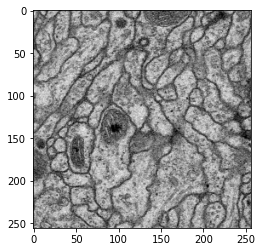

In [ ]:
image=cv2.imread("/content/unet-master/data/membrane/test/13.png",0)
image=cv2.resize(np.array(image),(256,256))/255
plt.imshow(image,cmap="gray")
image=np.reshape(image,(1,256,256,1))

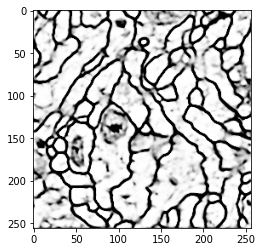

In [ ]:
pred=model.predict(image)
pred=np.reshape(pred[0],(256,256))
plt.imshow(pred,cmap="gray")

In [ ]:
io.imsave("13_pred.png",pred)